# Linear Regression with Cross Validation

## Setting Up The Working Environment

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Data Example

In [2]:
# importing boston dataset from sklearn
from sklearn.datasets import load_boston

In [3]:
# Setting X and y
X = load_boston().data
y = load_boston().target

In [4]:
# Transfrom X into DataFrame
boston = pd.DataFrame(X, columns=load_boston().feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


## K-fold Cross Validation

**Why Cross Validation?**

You may have noticed that __train/test split__ technique has some pitfalls or drawbacks such as: 
  
  - In case of a small data set, only a subset of observations are used to train the model. Which might not be enough to capture all the variations in the data. 
  
  - The metric used to measure the model performance is based on the test set, which suffers from:
      - **High variability**: whenever we split the data again, the metric will change, because it depends on the observations in test set.
      - **Less generalizibility**: If the test set has peculiarities of outliers, that will affect the metric used, which will not make it a good metric to generalize on unseen data.
      
Thus, relying on the metric computed from the test set maybe misleading. For this reason we had to search for another technique.

**Can we overcome these pitfalls?**

**Cross Validation** comes to correct the **train/test split** technique problems. 

## Cross Validation 

- In cross validation there are many training/validation splits, not just one.

- Cross validation gives us the chance train and assess the model various times on training/validation combinations.

- Running and testing a model several times make our **metrics more reliable**.


### The Methodology of K-fold Cross Validation

  1. Split the data set randomly into K folds (groups) (5-fold or 10-fold are common splits)
  
  2. Train the model on **K-1** folds, and test the model on the left one, then compute the desired metric. 
  
  3. Repeat step two untill all folds are used as a test set. 
  
  4. Compute the average of the computed metric from each step. 
  
### Advantages of Cross Validation
  
- If we split our data into 80% training and 20% validation set; in each iteration, a 80% of the data is used to train the model, and 20% is used to validate the model. 

- This technique allows us to use all of the data to be use only once to validate the model. This ensures that every point is used for validation exactly one time. 

- Ensuring using each point in the validation set only once is not required (Bootstrapping can be used, but in practice, they have been proved to give similar results).
  
#### Note: 

  - If we split the the data into 5, we say 5-Fold CV
  - If we split the the data into 10, we say 10-Fold CV, and so on. 
  
#### 5-Fold CV Example:

1. If R^2 is the metric

 $$R^{2} = \frac {1}{K} \sum_{i=1}^{K} R^{2}_{i}$$

2. If MSE (Mean Squared Error) is the metric

 $$MSE = \frac {1}{K} \sum_{i=1}^{K} MSE_{i}$$

In [5]:
from IPython.core.display import Image, HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

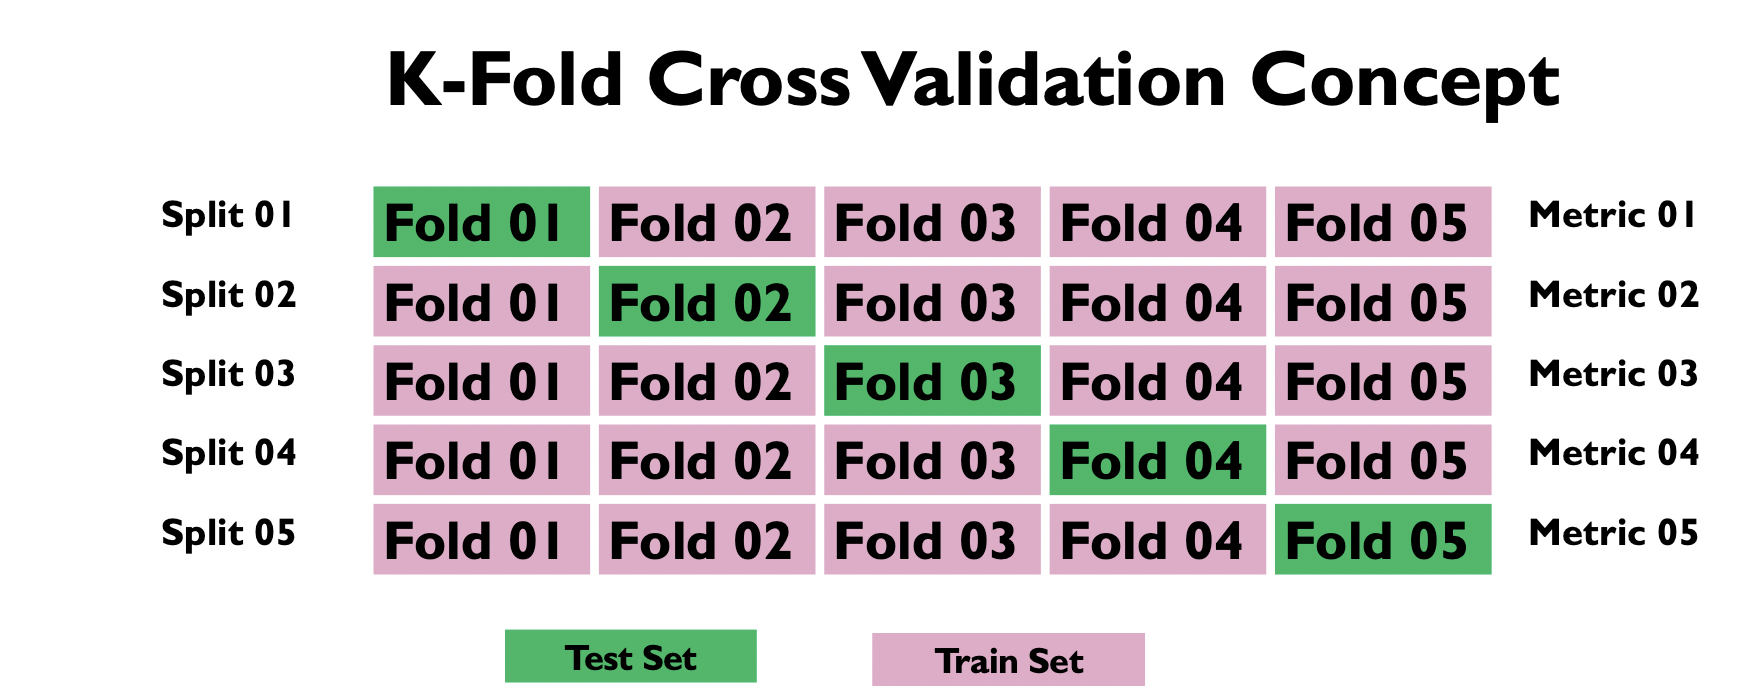

In [6]:
Image('KfoldCV.png')

## Performing Cross Validation Manually Using KFold() Function

- `sk-learn` provides us with a function called `KFold()`.

- We can use `KFold` function to split data into several training and validation sets.

- **KFold() Function arguments**:
    - **n_splits**: to specify the number of splits we want.
    - **shuffle**: to specify whether we want the data to be shuffled.
    - **random_state**: we can set a number if we want to replicate our results.

- It is important to understand the principle of `KFold()` function, which returns the indexes of the data, not the data points themselves. `KFold` function creates a __generator__.
- The `KFold` generator contains the indexes of the training and the validation data sets.

- **KFold** is useful when we want to fit the same model several times. To do that,  If we need to use `for loop` to loop through the indexes of training and validation sets, then fit the required model.

**Syntax**:

```python 
from sklearn.model_selection import KFold

# Create KFold generator
kf = KFold(n_splits=5, shuffle=True, random_state=10123)

# Create splits
splits = kf.split(X)

# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: {:s}".format(len(train_index))
    print("Number of validation indices:{:s}".format(len(val_index))
```

### Priliminary Example of Using KFold
We generate some data in order to show how this techniques works

In [7]:
# generate data
X = np.arange(1, 51)
y = np.array([np.repeat(1, 25), np.repeat(2, 25)]).flatten()

In [8]:
# Import KFold function
from sklearn.model_selection import KFold

In [9]:
# create 5 k-fold splites, whithout shuffling
kf_ord = KFold(n_splits=5, shuffle=False)
# Create splits
splits = kf_ord.split(X)

In [10]:
# Print the number of indices
for train_index, val_index in splits:
    print(len(train_index), len(val_index))

40 10
40 10
40 10
40 10
40 10


In [11]:
# Print the indexes of one train_index and one val_index
print(train_index, val_index)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39] [40 41 42 43 44 45 46 47 48 49]


If we were the shuffle the data, the order won't matter any more.

In [12]:
# create 5 k-fold splites, whith shuffling
kf_shuf = KFold(n_splits=5, shuffle=True, random_state=10123)
# Create splits
splits_shuf = kf_shuf.split(X)
# Print the number of indices
for train_index, val_index in splits_shuf:
    print(len(train_index), len(val_index))

40 10
40 10
40 10
40 10
40 10


In [13]:
# Print the indexes of one train_index and one val_index
print(train_index, val_index)

[ 0  1  2  3  5  6  7  8  9 10 12 16 17 18 19 21 22 23 24 25 26 27 31 32
 33 34 35 36 37 38 39 40 42 43 44 45 46 47 48 49] [ 4 11 13 14 15 20 28 29 30 41]


## KFold In Practice

In [20]:
X = load_boston().data
y = load_boston().target

In [21]:
# Import KFold from sklearn.model_selection
from sklearn.model_selection import KFold

# Create KFold generator
kf = KFold(n_splits=5, shuffle=True, random_state=10123)

# Create splits
splits = kf.split(X)

In [22]:
# Print the number of indices
for train_index, val_index in splits:
    print("Number of training indices: {}".format(len(train_index)))
    print("Number of validation indices: {}".format(len(val_index)))
    print()

Number of training indices: 404
Number of validation indices: 102

Number of training indices: 405
Number of validation indices: 101

Number of training indices: 405
Number of validation indices: 101

Number of training indices: 405
Number of validation indices: 101

Number of training indices: 405
Number of validation indices: 101



In [23]:
# Import the required tools
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
lreg = LinearRegression()

### Fitting the model

In [24]:
# Create KFold generator
kf = KFold(n_splits=5, shuffle=True, random_state=10123)

# Create splits
splits = kf.split(X)

# Access the training and validation indices of splits by using a for loop
for train_index, val_index in splits:
   
    # Split the data into a train and a validation set
    X_train, y_train = X[train_index], y[train_index]
    X_val, y_val = X[val_index], y[val_index]
    
    # Fit a linear regression
    lreg.fit(X_train, y_train)
    
    # Make predictions, and print mean squared error and mae
    preds = lreg.predict(X_val)
    print("The MSE metric: {:.5f}".format(mean_squared_error(y_val, preds)))
    print("The MAE metric: {:.5f}".format(mean_absolute_error(y_val, preds)))
    print()

The MSE metric: 19.99443
The MAE metric: 3.37722

The MSE metric: 39.91115
The MAE metric: 3.74241

The MSE metric: 22.85837
The MAE metric: 3.30429

The MSE metric: 21.65831
The MAE metric: 3.58502

The MSE metric: 18.20975
The MAE metric: 3.03346



## Automating K-fold Cross Validation with cross_val_score() Function

- **KFold** function requires from us to use a `for loop`, which usually inefficient (we know that loops takes longer time). 

- Fortunately, sklearn has an automatic function to perform **k-fold cross validation**, which is __cross_val_score()__.

## Fitting Linear Regression Model Using Cross Validation

As before, we use sklearn API. So, we need to import LinearRegression and instatiate an abject. 

From __sklearn.model_selection__ we import __cross_val_score__

#### The cross_val_score() method parameters

The cross_val_score() requires four parameters, and other several arguments, but we  talk about the required arguments here, and we will talk about other options in later lectures.
  - **estimator**: the specific model to be used (linear regression in this lecture)
  - **X**: the inputs of the complete training dataset.
  - **y**: the complete values of the target variable.
  - **cv**: the parameter cv allows us to specify the number of cross-validation splits (or folds).
  
Syntax:
```python
from sklear.model_selection import cross_val_score
```

### Performing Cross Validation

  To perform cross validation, you need to pass a Linear Regression object, the features data, and the target data, finally you set the number of folds.
  
  - **cross_val_score** splits the data into k-folds and compute R^2 by default, and it returns an array of the R^2 metric. 
Syntax:
```python
cross_val_score(lreg, X, y, cv = k-folds (5 or 10 ...))
```

In [26]:
X = load_boston().data
y = load_boston().target

In [27]:
# Import Linear Regression, and cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [28]:
# Instantiate a LR object
lreg = LinearRegression()

In [29]:
# perform cross validation
cv_results = cross_val_score(lreg, X, y, cv = 5)

In [30]:
# print the type of CV results
print(type(cv_results))

<class 'numpy.ndarray'>


In [31]:
cv_results

array([ 0.63919994,  0.71386698,  0.58702344,  0.07923081, -0.25294154])

In [32]:
# compute the average R^2
avg_r_sq = np.mean(cv_results)
print(f"The average R^2 is: {avg_r_sq :.4f}")

The average R^2 is: 0.3533


This value is lower than the value we found in the train/test split technique (0.55).

If we were to trust that model, we would be over optimistic about our model. 

This often leads poor performance of the model on unseen data; in other words, it does not generalize well. 

## Scoring The Cross Validation Results with Different Metrics

- If you want to use a different scoring function, you can create a scorer by using the **make_scorer()** method from `sklearn.metrics`, then specify metric you'd like to use.

- Set the **argument scoring** in `cross_val_score()` function the scorer you chosed.

**Syntax**:
```python
from sklearn.metrics import make scorer, mean_absolute_error
# Create mae scorer
mae = make_scorer(mean_absolute_error)
# Set the scorer
cross_val_score(lreg, X, y, cv = 5, scoring = mae) 
```

After scoring, report the mean of the metric used.

In [33]:
# Import the necessary tools for performing Cross Validation
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, make_scorer

In [34]:
# Create linear regression object
lreg_cv = LinearRegression()

In [35]:
# make mae scorer
mae = make_scorer(mean_absolute_error)
# perform 5-fold CV
cv_res = cross_val_score(lreg_cv,
                         X, y,
                        cv = 5,
                        scoring=mae)

In [36]:
# Look at the results
print(cv_res)

[2.62190565 3.90725478 4.386606   5.57073637 4.76333993]


In [37]:
# Print the mean error
print(cv_res.mean())

4.249968544192539


In [38]:
# make mse scorer
mse = make_scorer(mean_squared_error)
# perform 5-fold CV
cv_res = cross_val_score(lreg_cv,
                         X, y,
                        cv = 5,
                        scoring=mse)

In [39]:
print(cv_res)

[12.46030057 26.04862111 33.07413798 80.76237112 33.31360656]


In [40]:
# Print the mean error
print(cv_res.mean())

37.131807467699204


## Supplementary part (Optional)

### Note: 

K-fold Cross Validation is computationally expensive. because we are fitting many models. To show the time we will use the magic command `%%timeit` to see the difference between 5-fold CV, and a 10-fold CV

In [ ]:
# Perform 5-fold CV
k_5_cv = cross_val_score(lreg, X, y, cv = 5)
print(np.mean(k_5_cv ))

In [ ]:
# Perform 10-fold CV
k_10_cv = cross_val_score(lreg, X, y, cv = 10)
print(np.mean(k_10_cv))

In [ ]:
%%timeit 
cross_val_score(lreg, X, y, cv = 5)

In [ ]:
%%timeit 
cross_val_score(lreg, X, y, cv = 10)

## Train / Validation / Test set 

- One approach to test different models and parameter sets is to split the data into training, validation, and testing datasets.

- In order to split the data into training and testing datasets, firts we split the data into **two sets, temporary and train sets**, then we split the train set into  **validation set** and **train set**.

- we `train_test_split()` function from sklearn to do the splitting. 

**Syntax**:

```python
# Create training and temporay sets. 
X_temp, X_test, y_temp, y_test  =\
             train_test_split(X, y,
                              test_size= 0.15, 
                              random_state=10123)
# Create validation and train sets
X_train, X_val, y_train, y_val  =\
             train_test_split(X_temp, y_temp,
                              test_size= 0.25, 
                              random_state=10123)
```

In [ ]:
# import train_test_split
from sklearn.model_selection import train_test_split 
# Create training and temporay sets. 
X_temp, X_test, y_temp, y_test  =\
             train_test_split(X, y,
                              test_size= 0.15, 
                              random_state=10123)
# Create validation and train sets
X_train, X_val, y_train, y_val  =\
             train_test_split(X_temp, y_temp,
                              test_size= 0.25, 
                              random_state=10123)

In [ ]:
# Print the shapes of the sets
print(X_train.shape, X_test.shape, X_val.shape, y_train.shape,\
      y_test.shape, y_val.shape)

### When to use Train / Validation / Test Sets

- It is important to understand when you would use three datasets (training, validation, and testing) instead of two (training and testing).

- Three datasets are useful in many cases:
   - When testing parameters.
   - When Tuning hyper-parameters.
   - When Frequently evaluate the model performance.